In [1]:
using DifferentialEquations, DiffEqProblemLibrary, ParameterizedFunctions, Plots, ODE, ODEInterfaceDiffEq, LSODA
gr() # gr(fmt=:png)

const k1=.35e0
const k2=.266e2
const k3=.123e5
const k4=.86e-3
const k5=.82e-3
const k6=.15e5
const k7=.13e-3
const k8=.24e5
const k9=.165e5
const k10=.9e4
const k11=.22e-1
const k12=.12e5
const k13=.188e1
const k14=.163e5
const k15=.48e7
const k16=.35e-3
const k17=.175e-1
const k18=.1e9
const k19=.444e12
const k20=.124e4
const k21=.21e1
const k22=.578e1
const k23=.474e-1
const k24=.178e4
const k25=.312e1

function f(dy,y,p,t)
 r1  = k1 *y[1]
 r2  = k2 *y[2]*y[4]
 r3  = k3 *y[5]*y[2]
 r4  = k4 *y[7]
 r5  = k5 *y[7]
 r6  = k6 *y[7]*y[6]
 r7  = k7 *y[9]
 r8  = k8 *y[9]*y[6]
 r9  = k9 *y[11]*y[2]
 r10 = k10*y[11]*y[1]
 r11 = k11*y[13]
 r12 = k12*y[10]*y[2]
 r13 = k13*y[14]
 r14 = k14*y[1]*y[6]
 r15 = k15*y[3]
 r16 = k16*y[4]
 r17 = k17*y[4]
 r18 = k18*y[16]
 r19 = k19*y[16]
 r20 = k20*y[17]*y[6]
 r21 = k21*y[19]
 r22 = k22*y[19]
 r23 = k23*y[1]*y[4]
 r24 = k24*y[19]*y[1]
 r25 = k25*y[20]

 dy[1]  = -r1-r10-r14-r23-r24+
          r2+r3+r9+r11+r12+r22+r25
 dy[2]  = -r2-r3-r9-r12+r1+r21
 dy[3]  = -r15+r1+r17+r19+r22
 dy[4]  = -r2-r16-r17-r23+r15
 dy[5]  = -r3+r4+r4+r6+r7+r13+r20
 dy[6]  = -r6-r8-r14-r20+r3+r18+r18
 dy[7]  = -r4-r5-r6+r13
 dy[8]  = r4+r5+r6+r7
 dy[9]  = -r7-r8
 dy[10] = -r12+r7+r9
 dy[11] = -r9-r10+r8+r11
 dy[12] = r9
 dy[13] = -r11+r10
 dy[14] = -r13+r12
 dy[15] = r14
 dy[16] = -r18-r19+r16
 dy[17] = -r20
 dy[18] = r20
 dy[19] = -r21-r22-r24+r23+r25
 dy[20] = -r25+r24
end

function f(::Type{Val{:jac}},J,y,p,t)
      J .= 0.0
      J[1,1]   = -k1-k10*y[11]-k14*y[6]-k23*y[4]-k24*y[19]
      J[1,11]  = -k10*y[1]+k9*y[2]
      J[1,6]   = -k14*y[1]
      J[1,4]   = -k23*y[1]+k2*y[2]
      J[1,19]  = -k24*y[1]+k22
      J[1,2]   = k2*y[4]+k9*y[11]+k3*y[5]+k12*y[10]
      J[1,13]  = k11
      J[1,20]  = k25
      J[1,5]   = k3*y[2]
      J[1,10]  = k12*y[2]

      J[2,4]   = -k2*y[2]
      J[2,5]   = -k3*y[2]
      J[2,11]  = -k9*y[2]
      J[2,10]  = -k12*y[2]
      J[2,19]  = k21
      J[2,1]   = k1
      J[2,2]   = -k2*y[4]-k3*y[5]-k9*y[11]-k12*y[10]

      J[3,1]   = k1
      J[3,4]   = k17
      J[3,16]  = k19
      J[3,19]  = k22
      J[3,3]   = -k15

      J[4,4]   = -k2*y[2]-k16-k17-k23*y[1]
      J[4,2]   = -k2*y[4]
      J[4,1]   = -k23*y[4]
      J[4,3]   = k15

      J[5,5]   = -k3*y[2]
      J[5,2]   = -k3*y[5]
      J[5,7]   = 2k4+k6*y[6]
      J[5,6]   = k6*y[7]+k20*y[17]
      J[5,9]   = k7
      J[5,14]  = k13
      J[5,17]  = k20*y[6]

      J[6,6]   = -k6*y[7]-k8*y[9]-k14*y[1]-k20*y[17]
      J[6,7]   = -k6*y[6]
      J[6,9]   = -k8*y[6]
      J[6,1]   = -k14*y[6]
      J[6,17]  = -k20*y[6]
      J[6,2]   = k3*y[5]
      J[6,5]   = k3*y[2]
      J[6,16]  = 2k18

      J[7,7]   = -k4-k5-k6*y[6]
      J[7,6]   = -k6*y[7]
      J[7,14]  = k13

      J[8,7]   = k4+k5+k6*y[6]
      J[8,6]   = k6*y[7]
      J[8,9]   = k7

      J[9,9]   = -k7-k8*y[6]
      J[9,6]   = -k8*y[9]

      J[10,10] = -k12*y[2]
      J[10,2]  = -k12*y[10]+k9*y[11]
      J[10,9]  = k7
      J[10,11] = k9*y[2]

      J[11,11] = -k9*y[2]-k10*y[1]
      J[11,2]  = -k9*y[11]
      J[11,1]  = -k10*y[11]
      J[11,9]  = k8*y[6]
      J[11,6]  = k8*y[9]
      J[11,13] = k11

      J[12,11] = k9*y[2]
      J[12,2]  = k9*y[11]

      J[13,13] = -k11
      J[13,11] = k10*y[1]
      J[13,1]  = k10*y[11]

      J[14,14] = -k13
      J[14,10] = k12*y[2]
      J[14,2]  = k12*y[10]

      J[15,1]  = k14*y[6]
      J[15,6]  = k14*y[1]

      J[16,16] = -k18-k19
      J[16,4]  = k16

      J[17,17] = -k20*y[6]
      J[17,6]  = -k20*y[17]

      J[18,17] = k20*y[6]
      J[18,6]  = k20*y[17]

      J[19,19] = -k21-k22-k24*y[1]
      J[19,1]  = -k24*y[19]+k23*y[4]
      J[19,4]  = k23*y[1]
      J[19,20] = k25

      J[20,20] = -k25
      J[20,1]  = k24*y[19]
      J[20,19] = k24*y[1]

      return
end

u0 = zeros(20)
u0[2]  = 0.2
u0[4]  = 0.04
u0[7]  = 0.1
u0[8]  = 0.3
u0[9]  = 0.01
u0[17] = 0.007
prob = ODEProblem(f,u0,(0.0,60.0))

sol = solve(prob,Rodas4(),abstol=1/10^14,reltol=1/10^14)
test_sol = TestSolution(sol)
abstols = 1./10.^(4:11)
reltols = 1./10.^(1:8);


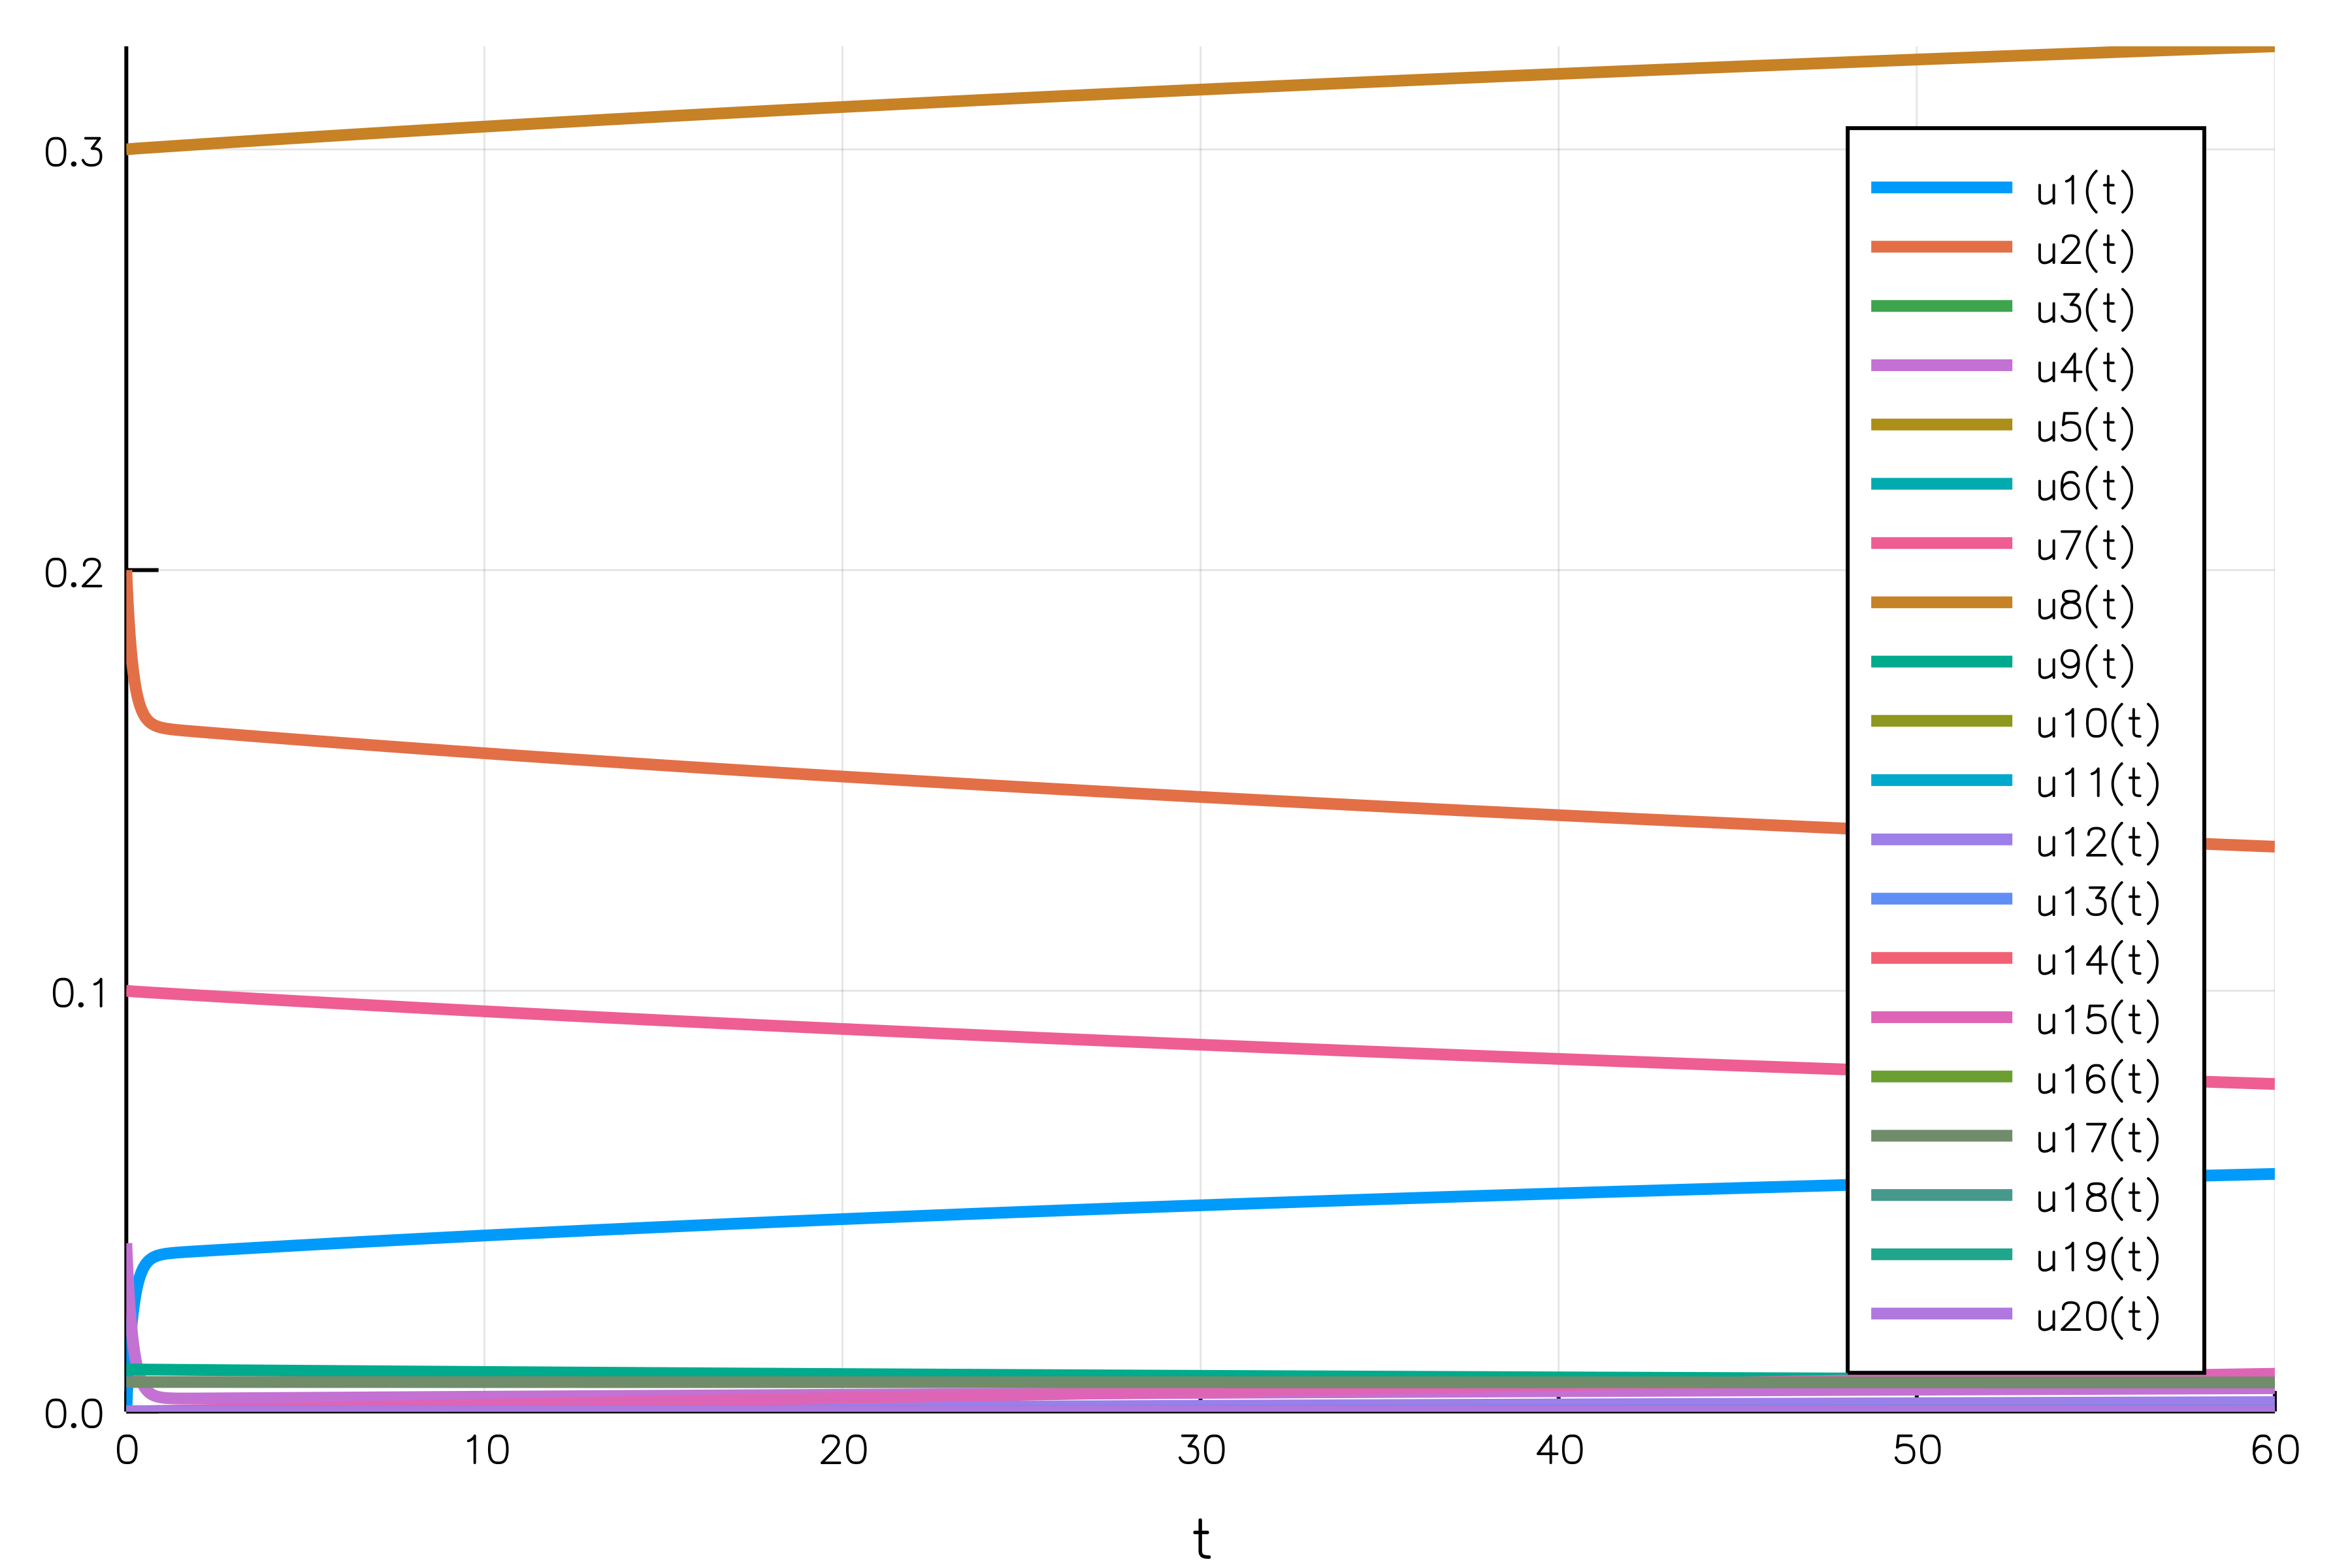

In [2]:
plot(sol)


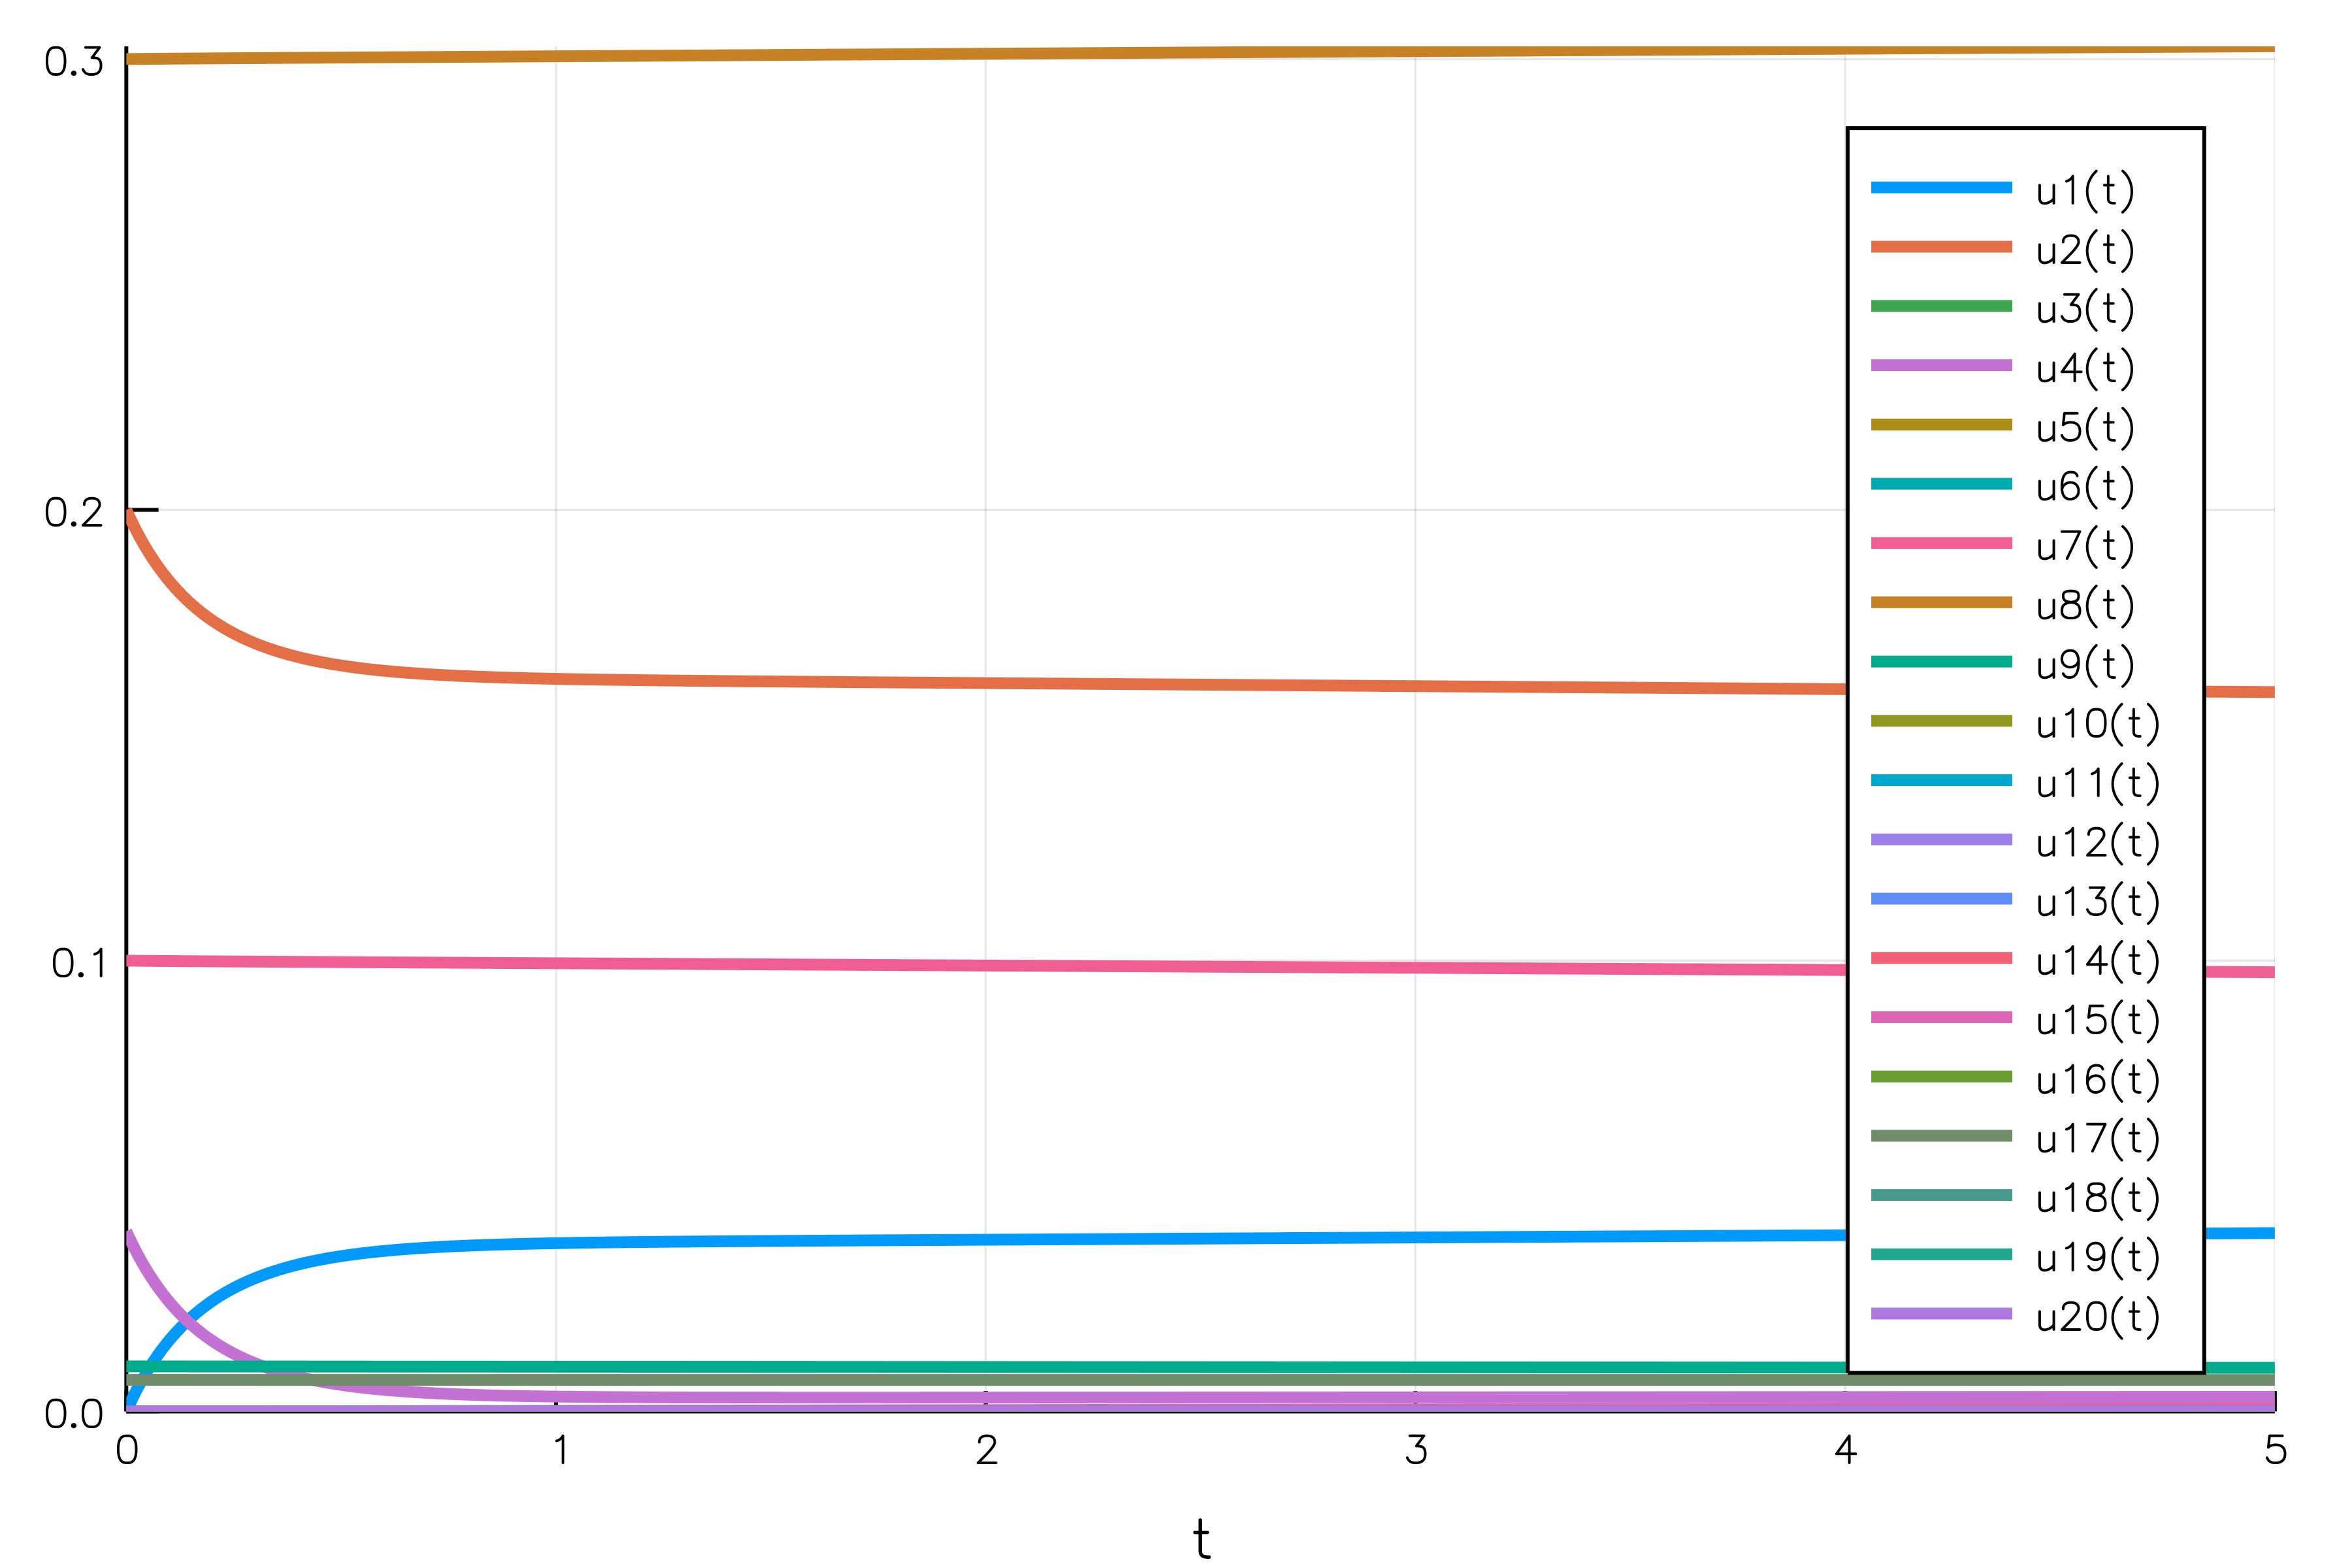

In [3]:
plot(sol,tspan=(0.0,5.0))

## Omissions

The following were omitted from the tests due to convergence failures. ODE.jl's adaptivity is not able to stabilize its algorithms, while GeometricIntegrators.jl's methods either fail to converge at comparable dts (or on some computers errors)

In [4]:
sol = solve(prob,ode23s()); println("Total ODE.jl steps: $(length(sol))")
using GeometricIntegratorsDiffEq
try
    sol = solve(prob,GIRadIIA3(),dt=1/10)
catch e
    println(e)
end

Total ODE.jl steps: 1


## High Tolerances

This is the speed when you just want the answer.

In [6]:
abstols = 1./10.^(5:8)
reltols = 1./10.^(1:4);
setups = [Dict(:alg=>Rosenbrock23()),
          Dict(:alg=>Rodas3()),
          Dict(:alg=>TRBDF2()),
          Dict(:alg=>CVODE_BDF()),
          Dict(:alg=>rodas()),
          Dict(:alg=>radau()),
          Dict(:alg=>lsoda())]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;verbose=false,
                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e5))
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 - 
 
 
 7.5 
 
 
 10 
 
 
 - 
 
 
 7.0 
 
 
 10 
 
 
 - 
 
 
 6.5 
 
 
 10 
 
 
 - 
 
 
 6.0 
 
 
 10 
 
 
 - 
 
 
 5.5 
 
 
 10 
 
 
 - 
 
 
 5.0 
 
 
 10 
 
 
 - 
 
 
 3.4 
 
 
 10 
 
 
 - 
 
 
 3.2 
 
 
 10 
 
 
 - 
 
 
 3.0 
 
 
 10 
 
 
 - 
 
 
 2.8 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rosenbrock23 
 
 
 
 OrdinaryDiffEq.Rodas3 
 
 
 
 OrdinaryDiffEq.TRBDF2 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 ODEInterfaceDiffEq.rodas 
 
 
 
 ODEInterfaceDiffEq.radau 
 
 
 
 LSODA.lsoda

In [3]:
wp = WorkPrecisionSet(prob,abstols,reltols,setups;dense = false,verbose = false,
                      appxsol=test_sol,maxiters=Int(1e5),error_estimate=:l2)
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 - 
 
 
 7 
 
 
 10 
 
 
 - 
 
 
 6 
 
 
 10 
 
 
 - 
 
 
 5 
 
 
 10 
 
 
 - 
 
 
 4 
 
 
 10 
 
 
 - 
 
 
 3 
 
 
 10 
 
 
 - 
 
 
 3.25 
 
 
 10 
 
 
 - 
 
 
 3.00 
 
 
 10 
 
 
 - 
 
 
 2.75 
 
 
 10 
 
 
 - 
 
 
 2.50 
 
 
 10 
 
 
 - 
 
 
 2.25 
 
 
 10 
 
 
 - 
 
 
 2.00 
 
 
 10 
 
 
 - 
 
 
 1.75 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rosenbrock23 
 
 
 
 OrdinaryDiffEq.Rodas3 
 
 
 
 OrdinaryDiffEq.TRBDF2 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 ODEInterfaceDiffEq.rodas 
 
 
 
 ODEInterfaceDiffEq.radau 
 
 
 
 LSODA.lsoda

In [5]:
wp = WorkPrecisionSet(prob,abstols,reltols,setups;verbose=false,
                      appxsol=test_sol,maxiters=Int(1e5),error_estimate=:L2)
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 - 
 
 
 7 
 
 
 10 
 
 
 - 
 
 
 6 
 
 
 10 
 
 
 - 
 
 
 5 
 
 
 10 
 
 
 - 
 
 
 4 
 
 
 10 
 
 
 - 
 
 
 3 
 
 
 10 
 
 
 - 
 
 
 3.25 
 
 
 10 
 
 
 - 
 
 
 3.00 
 
 
 10 
 
 
 - 
 
 
 2.75 
 
 
 10 
 
 
 - 
 
 
 2.50 
 
 
 10 
 
 
 - 
 
 
 2.25 
 
 
 10 
 
 
 - 
 
 
 2.00 
 
 
 10 
 
 
 - 
 
 
 1.75 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rosenbrock23 
 
 
 
 OrdinaryDiffEq.Rodas3 
 
 
 
 OrdinaryDiffEq.TRBDF2 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 ODEInterfaceDiffEq.rodas 
 
 
 
 ODEInterfaceDiffEq.radau 
 
 
 
 LSODA.lsoda

In [8]:
setups = [Dict(:alg=>Rosenbrock23()),
          Dict(:alg=>Kvaerno3()),
          Dict(:alg=>CVODE_BDF()),
          Dict(:alg=>KenCarp4()),
          Dict(:alg=>TRBDF2()),
          Dict(:alg=>KenCarp3()),
          Dict(:alg=>Rodas4()),
          Dict(:alg=>radau())]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e5))
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10^-7.5 
 
 
 10^-7.0 
 
 
 10^-6.5 
 
 
 10^-6.0 
 
 
 10^-5.5 
 
 
 10^-5.0 
 
 
 10^-3.4 
 
 
 10^-3.2 
 
 
 10^-3.0 
 
 
 10^-2.8 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rosenbrock23 
 
 
 
 OrdinaryDiffEq.Kvaerno3 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 OrdinaryDiffEq.KenCarp4 
 
 
 
 OrdinaryDiffEq.TRBDF2 
 
 
 
 OrdinaryDiffEq.KenCarp3 
 
 
 
 ODEInterfaceDiffEq.radau

In [9]:
wp = WorkPrecisionSet(prob,abstols,reltols,setups;dense = false,verbose = false,
                      appxsol=test_sol,maxiters=Int(1e5),error_estimate=:l2)
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10^-7.0 
 
 
 10^-6.5 
 
 
 10^-6.0 
 
 
 10^-5.5 
 
 
 10^-5.0 
 
 
 10^-4.5 
 
 
 10^-3.4 
 
 
 10^-3.2 
 
 
 10^-3.0 
 
 
 10^-2.8 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rosenbrock23 
 
 
 
 OrdinaryDiffEq.Kvaerno3 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 OrdinaryDiffEq.KenCarp4 
 
 
 
 OrdinaryDiffEq.TRBDF2 
 
 
 
 OrdinaryDiffEq.KenCarp3 
 
 
 
 ODEInterfaceDiffEq.radau

In [10]:
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      appxsol=test_sol,maxiters=Int(1e5),error_estimate=:L2)
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10^-7.0 
 
 
 10^-6.5 
 
 
 10^-6.0 
 
 
 10^-5.5 
 
 
 10^-5.0 
 
 
 10^-4.5 
 
 
 10^-3.3 
 
 
 10^-3.2 
 
 
 10^-3.1 
 
 
 10^-3.0 
 
 
 10^-2.9 
 
 
 10^-2.8 
 
 
 10^-2.7 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rosenbrock23 
 
 
 
 OrdinaryDiffEq.Kvaerno3 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 OrdinaryDiffEq.KenCarp4 
 
 
 
 OrdinaryDiffEq.TRBDF2 
 
 
 
 OrdinaryDiffEq.KenCarp3 
 
 
 
 ODEInterfaceDiffEq.radau

In [7]:
setups = [Dict(:alg=>Rosenbrock23()),
          Dict(:alg=>KenCarp5()),
          Dict(:alg=>KenCarp4()),
          Dict(:alg=>KenCarp3()),
          Dict(:alg=>ARKODE(order=5)),
          Dict(:alg=>ARKODE()),
          Dict(:alg=>ARKODE(order=3))]
names = ["Rosenbrock23" "KenCarp5" "KenCarp4" "KenCarp3" "ARKODE5" "ARKODE4" "ARKODE3"]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      names=names,save_everystep=false,appxsol=test_sol,maxiters=Int(1e5))
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 - 
 
 
 8 
 
 
 10 
 
 
 - 
 
 
 7 
 
 
 10 
 
 
 - 
 
 
 6 
 
 
 10 
 
 
 - 
 
 
 5 
 
 
 10 
 
 
 - 
 
 
 4 
 
 
 10 
 
 
 - 
 
 
 3.1 
 
 
 10 
 
 
 - 
 
 
 3.0 
 
 
 10 
 
 
 - 
 
 
 2.9 
 
 
 10 
 
 
 - 
 
 
 2.8 
 
 
 10 
 
 
 - 
 
 
 2.7 
 
 
 10 
 
 
 - 
 
 
 2.6 
 
 
 10 
 
 
 - 
 
 
 2.5 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 Rosenbrock23 
 
 
 
 KenCarp5 
 
 
 
 KenCarp4 
 
 
 
 KenCarp3 
 
 
 
 ARKODE5 
 
 
 
 ARKODE4 
 
 
 
 ARKODE3

### Low Tolerances

This is the speed at lower tolerances, measuring what's good when accuracy is needed.

In [11]:
abstols = 1./10.^(7:13)
reltols = 1./10.^(4:10)

setups = [Dict(:alg=>GRK4A()),
          Dict(:alg=>Rodas4P()),
          Dict(:alg=>CVODE_BDF()),
          Dict(:alg=>ddebdf()),
          Dict(:alg=>Rodas4()),
          Dict(:alg=>rodas()),
          Dict(:alg=>radau()),
          Dict(:alg=>lsoda())]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;verbose=false,
                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e5))
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 - 
 
 
 14 
 
 
 10 
 
 
 - 
 
 
 12 
 
 
 10 
 
 
 - 
 
 
 10 
 
 
 10 
 
 
 - 
 
 
 8 
 
 
 10 
 
 
 - 
 
 
 6 
 
 
 10 
 
 
 - 
 
 
 3.0 
 
 
 10 
 
 
 - 
 
 
 2.5 
 
 
 10 
 
 
 - 
 
 
 2.0 
 
 
 10 
 
 
 - 
 
 
 1.5 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.GRK4A 
 
 
 
 OrdinaryDiffEq.Rodas4P 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 ODEInterfaceDiffEq.ddebdf 
 
 
 
 OrdinaryDiffEq.Rodas4 
 
 
 
 ODEInterfaceDiffEq.rodas 
 
 
 
 ODEInterfaceDiffEq.radau 
 
 
 
 LSODA.lsoda

In [9]:
wp = WorkPrecisionSet(prob,abstols,reltols,setups;verbose=false,
                      dense=false,appxsol=test_sol,maxiters=Int(1e5),error_estimate=:l2)
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 - 
 
 
 12 
 
 
 10 
 
 
 - 
 
 
 10 
 
 
 10 
 
 
 - 
 
 
 8 
 
 
 10 
 
 
 - 
 
 
 6 
 
 
 10 
 
 
 - 
 
 
 3 
 
 
 10 
 
 
 - 
 
 
 2 
 
 
 10 
 
 
 - 
 
 
 1 
 
 
 10 
 
 
 0 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.GRK4A 
 
 
 
 OrdinaryDiffEq.Rodas4P 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 ODEInterfaceDiffEq.ddebdf 
 
 
 
 OrdinaryDiffEq.Rodas4 
 
 
 
 ODEInterfaceDiffEq.rodas 
 
 
 
 ODEInterfaceDiffEq.radau 
 
 
 
 LSODA.lsoda

In [12]:
wp = WorkPrecisionSet(prob,abstols,reltols,setups;verbose=false,
                      appxsol=test_sol,maxiters=Int(1e5),error_estimate=:L2)
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10 
 
 
 - 
 
 
 12 
 
 
 10 
 
 
 - 
 
 
 10 
 
 
 10 
 
 
 - 
 
 
 8 
 
 
 10 
 
 
 - 
 
 
 6 
 
 
 10 
 
 
 - 
 
 
 3 
 
 
 10 
 
 
 - 
 
 
 2 
 
 
 10 
 
 
 - 
 
 
 1 
 
 
 10 
 
 
 0 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.GRK4A 
 
 
 
 OrdinaryDiffEq.Rodas4P 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 ODEInterfaceDiffEq.ddebdf 
 
 
 
 OrdinaryDiffEq.Rodas4 
 
 
 
 ODEInterfaceDiffEq.rodas 
 
 
 
 ODEInterfaceDiffEq.radau 
 
 
 
 LSODA.lsoda

In [14]:
setups = [
          Dict(:alg=>Rodas5()),
          Dict(:alg=>Kvaerno4()),
          Dict(:alg=>Kvaerno5()),
          Dict(:alg=>CVODE_BDF()),
          Dict(:alg=>KenCarp4()),
          Dict(:alg=>KenCarp5()),
          Dict(:alg=>Rodas4()),
          Dict(:alg=>radau())]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e5))
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10^-14 
 
 
 10^-12 
 
 
 10^-10 
 
 
 10^-8 
 
 
 10^-6 
 
 
 10^-3.0 
 
 
 10^-2.5 
 
 
 10^-2.0 
 
 
 10^-1.5 
 
 
 10^-1.0 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rodas5 
 
 
 
 OrdinaryDiffEq.Kvaerno4 
 
 
 
 OrdinaryDiffEq.Kvaerno5 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 OrdinaryDiffEq.KenCarp4 
 
 
 
 OrdinaryDiffEq.KenCarp5 
 
 
 
 OrdinaryDiffEq.Rodas4 
 
 
 
 ODEInterfaceDiffEq.radau

In [15]:
wp = WorkPrecisionSet(prob,abstols,reltols,setups;verbose=false,
                      dense=false,appxsol=test_sol,maxiters=Int(1e5),error_estimate=:l2)
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10^-12 
 
 
 10^-10 
 
 
 10^-8 
 
 
 10^-6 
 
 
 10^-3.0 
 
 
 10^-2.5 
 
 
 10^-2.0 
 
 
 10^-1.5 
 
 
 10^-1.0 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rodas5 
 
 
 
 OrdinaryDiffEq.Kvaerno4 
 
 
 
 OrdinaryDiffEq.Kvaerno5 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 OrdinaryDiffEq.KenCarp4 
 
 
 
 OrdinaryDiffEq.KenCarp5 
 
 
 
 OrdinaryDiffEq.Rodas4 
 
 
 
 ODEInterfaceDiffEq.radau

In [16]:
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      appxsol=test_sol,maxiters=Int(1e5),error_estimate=:L2)
plot(wp)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10^-12 
 
 
 10^-10 
 
 
 10^-8 
 
 
 10^-6 
 
 
 10^-3.0 
 
 
 10^-2.5 
 
 
 10^-2.0 
 
 
 10^-1.5 
 
 
 10^-1.0 
 
 
 Error 
 
 
 Time (s) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 OrdinaryDiffEq.Rodas5 
 
 
 
 OrdinaryDiffEq.Kvaerno4 
 
 
 
 OrdinaryDiffEq.Kvaerno5 
 
 
 
 Sundials.CVODE_BDF 
 
 
 
 OrdinaryDiffEq.KenCarp4 
 
 
 
 OrdinaryDiffEq.KenCarp5 
 
 
 
 OrdinaryDiffEq.Rodas4 
 
 
 
 ODEInterfaceDiffEq.radau

The following algorithms were removed since they failed.

In [17]:
#setups = [#Dict(:alg=>Hairer4()),
          #Dict(:alg=>Hairer42()),
          #Dict(:alg=>Rodas3()),
          #Dict(:alg=>Cash4())
#]
#wp = WorkPrecisionSet(prob,abstols,reltols,setups;
#                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e5))
#plot(wp)

### Conclusion

Sundials `CVODE_BDF` the best here. `lsoda` does well at high tolerances but then grows fast when tolerances get too low. `KenCarp4` or `Rodas5` is a decent substitute when necessary.